In [1]:
# 统计 新闻 内容和摘要长度并可视化
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import re
import numpy as np

In [4]:
data_dir = './datasets/new_train/'
idx = 1
data_json_file = os.path.join(data_dir, f'{idx}.json')
data = json.load(open(data_json_file, 'r'))
data['summary'], data['text']

(" star ` devastated and grief-stricken ' over sudden loss of his eldest child .   sage played the 66-year-old 's onscreen son in rocky v .   an autopsy is scheduled to take place in the next 48 hours after filmmaker was found next to prescription drugs . ",
 "sylvester stallone was said to have almost collapsed with grief on learning of the death of his son yesterday . the body of sage stallone , 36 , was found by his housekeeper at his los angeles home . prescription drugs were reportedly found nearby but police said it was too early to say whether they were the cause of his death . tragedy : sylvester stallone 's son sage was found dead this afternoon in his los angeles apartment after a suspected drug overdose . he was 36 , pictured here in 2006 in hollywood . a source close to stallone said : . ` when he heard the news , sly was shocked , short of breath and almost . collapsed . he just went quiet before sobbing uncontrollably . he is a . wreck at the moment . ' sage 's aunt melan

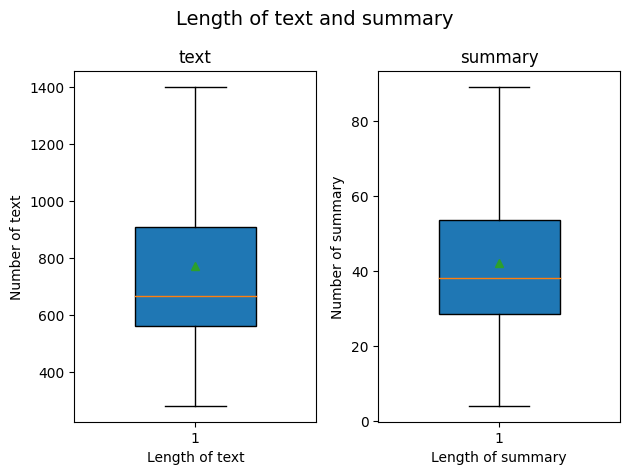

In [15]:

len_text = []
len_summary = []

for idx in range(1, 100):
    data_json_file = os.path.join(data_dir, f'{idx}.json')
    data = json.load(open(data_json_file, 'r'))
    text_len = len(data['text'].split())
    summary_len = len(data['summary'].split())
    len_text.append(text_len)
    len_summary.append(summary_len)

len_text = np.array(len_text)
len_summary = np.array(len_summary)

title = 'Length of text and summary'
plt.suptitle(title, fontsize=14)
ax1 = plt.subplot(121)
#箱图
ax1.boxplot(len_text, patch_artist=True, widths=0.5, showmeans=True, showcaps=True, showfliers=False)
for i, median in enumerate(ax1.artists):
    y = median.get_ydata()[1]  # 获取中位数的位置
    ax1.text(i + 1, y, f'{y:.2f}', ha='center', va='center', fontweight='bold')
ax1.set_title('text')
ax1.set_xlabel('Length of text')
ax1.set_ylabel('Number of text')
ax2 = plt.subplot(122)
ax2.boxplot(len_summary, patch_artist=True, widths=0.5, showmeans=True, showcaps=True, showfliers=False)

ax2.set_title('summary')
ax2.set_xlabel('Length of summary')
ax2.set_ylabel('Number of summary')
plt.tight_layout()
plt.show()